## FIGURE 3:

LOCAL CHANGES IN IMPERMEANT ANION AVERAGE CHARGE HAS AN EFFECT ON THE LOCAL MEMBRANE POTENTIALS AND CHLORIDE DRIVING FORCES

## IMPORTS

In [3]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## FILE SELECTIONS

In [54]:
#######################################################
#### GUI 

edt_filename1 = widgets.Text(description = 'File name', value=' Exp3-1_v2')
edt_filename2 = widgets.Text(description = 'File name', value='Exp3-2_v2_extended')
edt_filename3 = widgets.Text(description = 'File name', value=' Exp3-3_v2_extended')
edt_filename4 = widgets.Text(description = 'File name', value='Exp3-4_v2_extended')
edt_filename5 = widgets.Text(description = 'File name', value='Exp2_v2')

btn_select = widgets.Button(description = 'Select files',button_style='success', enabled=False)
btn_check_files = widgets.Button(description = 'Check files are present', button_style='info')
output_file = widgets.Output()
output_file.clear_output()

display(edt_filename1 ,edt_filename2, edt_filename3, edt_filename4, edt_filename5, btn_check_files, btn_select)

#######################################################
##### CHECK IF FILES ARE IN THE HOME DIRECTORY

def btn_check_files_clicked(b):
    
    file_name_arr= [edt_filename1.value, edt_filename2.value, edt_filename3.value, edt_filename4.value, edt_filename5.value]
    
    for i in range(len(file_name_arr)):
        file_name = "\\"
        file_name = file_name + file_name_arr[i]
        try: 
            with h5py.File(file_name, mode='r') as hdf:
                print(f" {file_name} found")
        except:
            print(f"{file_name} not found")
            
#######################################################
##### LOAD DATA FROM FILES INTO ARRAYS

def btn_select_clicked(b):
    
    global mega_arr, mega_ed_arr, file_name_arr
    
    file_name_arr= [edt_filename1.value, edt_filename2.value, edt_filename3.value, edt_filename4.value, edt_filename5.value]
    
    mega_arr = [] #contains all the compartment data for all the files
    mega_ed_arr = [] #contains all the electrodiffusion data for all the files

    
    for i in range(len(file_name_arr)):
        
        file_name = "\\"
        file_name = file_name + file_name_arr[i]
        
        with h5py.File(file_name, mode='r') as hdf:
                    
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())

            C1 = C.get(comp_names_arr[0])

            T = hdf.get('TIMING')
            if i==2 :
                total_t = round(T.get('EXTENDED_TOTAL_T')[()])
                intervals = T.get('EXTENDED_INTERVALS')[()] 
                dt = T.get("EXTENDED_DT")[()]
                total_steps = total_t /dt     
                print(f"Total t:  {total_t}")
                print(f"intervals: {intervals}")
                interval_step = round(total_steps / (intervals))
                print(f"interval step: {interval_step}")
                interval_arr = [round(interval_step * i) for i in range(intervals)]
                print(interval_arr[-5:-1])
            elif i==1 or i ==3:
                total_t = round(T.get('EXTENDED_TOTAL_T')[()])-1
                intervals = T.get('EXTENDED_INTERVALS')[()] 
                dt = T.get("EXTENDED_DT")[()]
                total_steps = total_t /dt     
                print(f"Total t:  {total_t}")
                print(f"intervals: {intervals}")
                interval_step = 30000
                print(f"interval step: {interval_step}")
                interval_arr = [round(interval_step * i) for i in range(intervals)]
                print(interval_arr[-5:-1])
            else:
                total_t = T.get('TOTAL_T')[()]
                intervals = T.get('INTERVALS')[()]
                dt = T.get("DT")[()]
                total_steps = total_t /dt
                interval_step = total_steps / intervals
                interval_arr = [round(interval_step * i) for i in range(intervals)]
                
   

            master_arr = []
            t_arr =[]


            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)

                data_arr_2 =[]
                last_time_point = len(list(C_group.keys()))-2
                dataset = C_group.get(str(interval_arr[last_time_point-1]))
                print(str(interval_arr[last_time_point-1]))
                data_arr = []
                for d in range(len(list(dataset))):
                    data_arr.append(dataset[d])

                data_arr_2.append(data_arr)
                if t_arr_bool == True:
                    t_arr.append(data_arr[0])         

                master_arr.append(data_arr_2)
                
            print(f" {file_name} compartment data loaded")
            t_arr_bool = False
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                E_group = E.get(E_group_arr[x])
                ED_data_arr =[] #stores the electrodiffusion data for a group
                last_time_point = len(list(E_group.keys()))-2
                

                dataset = E_group.get(str(interval_arr[last_time_point+1]))

                ED_data_arr_2 = [] #stores the dataset values for one dataset
                for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                    ED_data_arr_2.append(dataset[z])

                ED_data_arr.append(ED_data_arr_2) 

                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)

            print(f" {file_name} electrodiffusion data loaded")
            
        mega_arr.append(master_arr)
        mega_ed_arr.append(ED_master_arr)
            
            
btn_select.on_click(btn_select_clicked)
btn_check_files.on_click(btn_check_files_clicked)     

Text(value=' Exp3-1_v2', description='File name')

Text(value='Exp3-2_v2_extended', description='File name')

Text(value=' Exp3-3_v2_extended', description='File name')

Text(value='Exp3-4_v2_extended', description='File name')

Text(value='Exp2_v2', description='File name')

Button(button_style='info', description='Check files are present', style=ButtonStyle())

Button(button_style='success', description='Select files', style=ButtonStyle())

299910000
299910000
299910000
299910000
299910000
299910000
299910000
299910000
299910000
 \ Exp3-1_v2 compartment data loaded
 \ Exp3-1_v2 electrodiffusion data loaded
Total t:  349
intervals: 11666
interval step: 30000
[349830000, 349860000, 349890000, 349920000]
349890000
349890000
349890000
349890000
349890000
349890000
349890000
349890000
349890000
 \Exp3-2_v2_extended compartment data loaded
 \Exp3-2_v2_extended electrodiffusion data loaded
Total t:  90
intervals: 17999
interval step: 5000
[89970000, 89975000, 89980000, 89985000]
89980000
89980000
89980000
89980000
89980000
89980000
89980000
89980000
89980000
 \ Exp3-3_v2_extended compartment data loaded
 \ Exp3-3_v2_extended electrodiffusion data loaded
Total t:  349
intervals: 11666
interval step: 30000
[349830000, 349860000, 349890000, 349920000]
349890000
349890000
349890000
349890000
349890000
349890000
349890000
349890000
349890000
 \Exp3-4_v2_extended compartment data loaded
 \Exp3-4_v2_extended electrodiffusion data loade

In [55]:
######
btn_plot_3a = widgets.Button(description="Plot 3A", button_style='success')
display(btn_plot_3a)
#####


def btn_plot_3a_clicked(b):
    
    
    f3a, [ax_z,ax_vol,ax_x] = mplt.subplots(1,3,figsize = (15,3))
    f3a.tight_layout(pad=1)
    
    z_arr,vol_arr,x_arr = [],[],[]
    
    z_arr_2 = [-0.65,-0.75,-0.85,-0.95,-1.05]
    
    for i in range(len(comp_names_arr),0,-1):
        
        temp_arr_z = [round(mega_arr[j][i-1][-1][8],2) for j in  range(len(mega_arr))] 
        z_arr.append(temp_arr_z)
        
        temp_arr_vol = [round(mega_arr[j][i-1][-1][3] *1e15,1) for j in  range(len(mega_arr))] 
        vol_arr.append(temp_arr_vol)
        
        temp_arr_x = [round(mega_arr[j][i-1][-1][7] *1e3,1) for j in  range(len(mega_arr))] 
        x_arr.append(temp_arr_x)
        
    g = sns.heatmap(z_arr,cmap="Oranges", annot=True,fmt='', 
                    cbar_kws={'pad':0.05,'label':'Valence', 'orientation':'vertical' }, ax=ax_z,linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_z.set_title("Terminal z",fontsize=10)
    
    
    g = sns.heatmap(vol_arr,cmap="Oranges", annot=True,fmt='', yticklabels =False, 
                    cbar_kws={'pad':0.05,'label':'Volume(pl*1e^3)', 'orientation':'vertical' }, ax=ax_vol,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_vol.set_title("Terminal Volume",fontsize=10)
    
    g = sns.heatmap(x_arr,cmap="Oranges", annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Concentration (mM)','orientation':'vertical' }, ax=ax_x,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_x.set_title("Terminal [X]",fontsize=10)
    
    """
    f3a, [ax_x,ax_vol, ax_vm] = mplt.subplots(1,3,figsize=(15,5), sharex=False) 
    f3a.tight_layout(pad=4.0)
    
    global xconc_8_arr, vol_8_arr, vm_8_arr
    
    xconc_8_arr = [mega_arr[i][7][-1][7]*1e3 for i in range(len(mega_arr))]
    xconc_4_arr = [mega_arr[i][3][-1][7]*1e3 for i in range(len(mega_arr))]
    vol_8_arr = [mega_arr[i][7][-1][3]*1e12 for i in range(len(mega_arr))]
    vol_4_arr = [mega_arr[i][3][-1][3]*1e12 for i in range(len(mega_arr))]
    vm_8_arr = [mega_arr[i][7][-1][-3]*1e3 for i in range(len(mega_arr))]
    vm_4_arr = [mega_arr[i][3][-1][-3]*1e3 for i in range(len(mega_arr))]
    
    
    #ax_x.set_title("Compartment 8")
    ax_x.plot(z_arr,xconc_8_arr,linestyle='-',marker='o',label="Comp8")
    ax_x.plot(z_arr,xconc_4_arr,linestyle='-.',marker='x',label="Comp4")
    ax_x.set_ylabel("Impermeant anion conc. (mM)")
    ax_x.grid()
    ax_x.legend()
    
    ax_vol.plot(z_arr,vol_8_arr,linestyle='-',marker='o',label="Comp8")
    ax_vol.plot(z_arr,vol_4_arr,linestyle='-.',marker='x',label="Comp4")
    ax_vol.set_ylabel("Volume (pl)")
    ax_vol.grid()
    ax_vol.legend()
    
    ax_vm.plot(z_arr,vm_8_arr,linestyle='-',marker='o', label="Comp8")
    ax_vm.plot(z_arr,vm_4_arr,linestyle='-.',marker='x', label="Comp4")
    ax_vm.set_ylabel("Membrane potential (mV)")
    ax_vm.grid()
    ax_vm.legend()
    
    sns.despine()
    """
    
#####
btn_plot_3a.on_click(btn_plot_3a_clicked)

Button(button_style='success', description='Plot 3A', style=ButtonStyle())

[0.17279033 0.16343922 0.15498783 0.14732951 0.14036729]
[-0.65 -0.75 -0.85 -0.95 -1.05]
[1.40815950e-14 1.48872684e-14 1.56990616e-14 1.65151132e-14
 1.73342631e-14]
[-0.26583128 -0.21791896 -0.18233862 -0.15508369 -0.13368313]
[-0.2561708435631127, -0.22378241383999464, -0.1911479665059156, -0.15834232798784442, -0.12541213843358867]


NameError: name 'c' is not defined

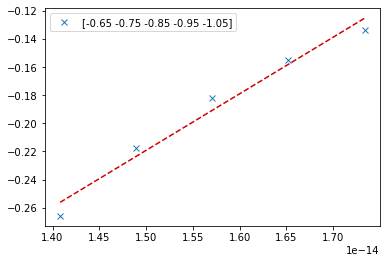

In [56]:
## finding the relationship between volume and concentration:



xconc_8_arr = [mega_arr[i][7][-1][7] for i in range(len(mega_arr))]
xconc_8_arr = np.array(xconc_8_arr)
vol_8_arr = [mega_arr[i][7][-1][3] for i in range(len(mega_arr))]
vol_8_arr = np.array(vol_8_arr)
z_arr = (-0.65,-0.75, -0.85, -0.95,-1.05)
z_arr= np.array(z_arr)
xz_arr= xconc_8_arr / z_arr



m, b = np.polyfit(vol_8_arr,xz_arr , 1)
best_fit_arr = [vol_8_arr[i]*m +b for i in range(len(vol_8_arr))]


# determine quality of the fit

# plot the results
mplt.plot(vol_8_arr,xz_arr, 'x', label=z_arr)
mplt.legend()
print(xconc_8_arr)
print(z_arr)
print(vol_8_arr)
print(xz_arr)
print(best_fit_arr)

mplt.plot(vol_8_arr, best_fit_arr, '--', label="fitted", color=colour_arr[2])

print('Linear relationship:  y=' +str(round(m,6))+'x' + ' + ' + str(round(c,5)))

## FIGURE-3B

Button(button_style='success', description='Plot 3B', style=ButtonStyle())

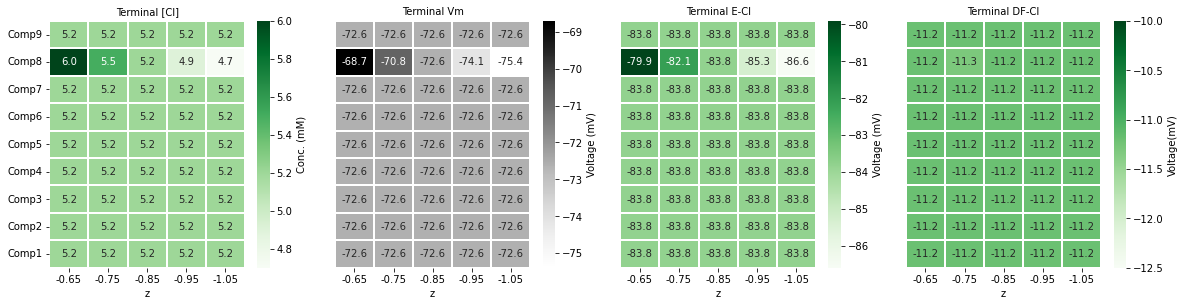

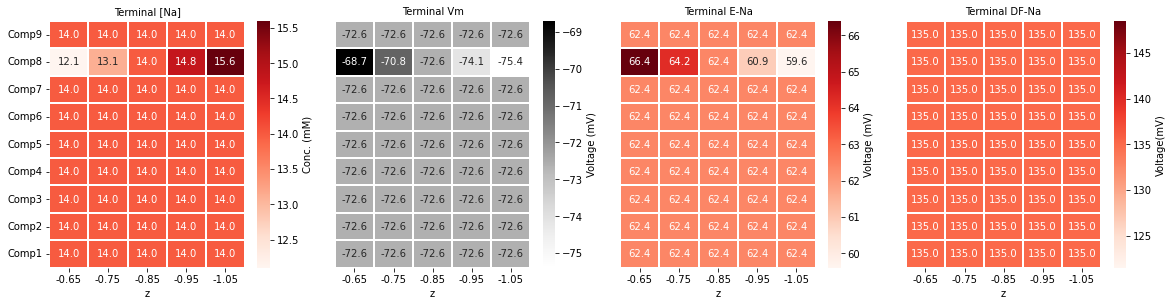

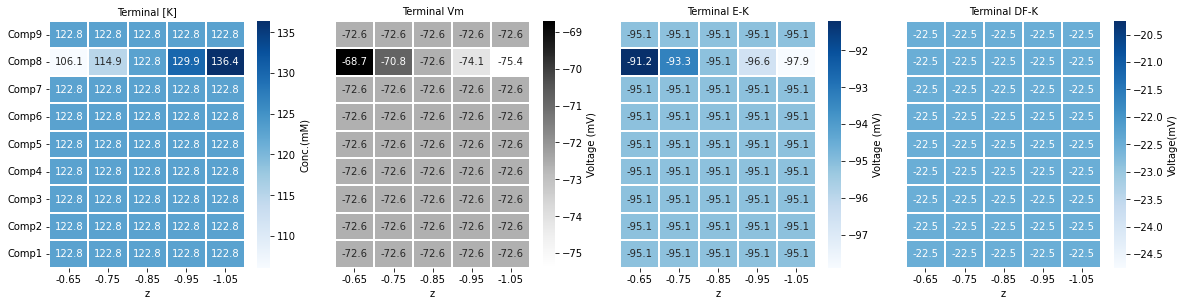

In [73]:
######
btn_plot_3b = widgets.Button(description="Plot 3B", button_style='success')
display(btn_plot_3b)
#####


z_arr_2 = [-0.65,-0.75,-0.85,-0.95,-1.05]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 


def btn_plot_3b_clicked(b):
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    f3b_cl, (ax_cl, ax_vm1 , ax_ecl,ax_cldf)=mplt.subplots(1,4, figsize=(16,4))
    f3b_na, (ax_na, ax_vm2 , ax_ena,ax_nadf)  =mplt.subplots(1,4, figsize=(16,4))      
    f3b_k,  (ax_k, ax_vm3 , ax_ek,ax_kdf) =mplt.subplots(1,4, figsize=(16,4))
    f3b_cl.tight_layout(pad=1)
    f3b_na.tight_layout(pad=1)
    f3b_k.tight_layout(pad=1)
    #width =0.3
    
    #####################################################################################
    # ROW 1 & 2 
    #####################################################################################
    
    cl_arr,na_arr, k_arr = [],[],[]
    vm_arr = []
    ecl_arr,ena_arr, ek_arr = [],[],[]
    cl_df_arr, na_df_arr, k_df_arr = [], [], []
    
    for i in range(len(comp_names_arr),0,-1):
    
        temp_arr_cl = [round(mega_arr[j][i-1][-1][6] *1e3,1) for j in  range(len(mega_arr))] 
        cl_arr.append(temp_arr_cl)
        
        temp_arr_na = [round(mega_arr[j][i-1][-1][4] *1e3,1) for j in  range(len(mega_arr))] 
        na_arr.append(temp_arr_na)
        
        temp_arr_k = [round(mega_arr[j][i-1][-1][5] *1e3,1) for j in  range(len(mega_arr))] 
        k_arr.append(temp_arr_k)
        
        temp_arr_vm = [round(mega_arr[j][i-1][-1][-3] *1e3,1) for j in  range(len(mega_arr))]
        vm_arr.append(temp_arr_vm)
        
        temp_arr_ecl = [round(mega_arr[j][i-1][-1][-1] *1e3,1) for j in  range(len(mega_arr))]
        ecl_arr.append(temp_arr_ecl)
        
        temp_arr_ek = [round(mega_arr[j][i-1][-1][-2] *1e3,1) for j in  range(len(mega_arr))]
        ek_arr.append(temp_arr_ek)
        
        temp_arr_ena = [round(-1*RTF * round(np.log(mega_arr[j][i-1][-1][4]/145e-3)*1e3,1),1) for j in  range(len(mega_arr))]
        ena_arr.append(temp_arr_ena)
        
        temp_arr_df= [round(round(mega_arr[j][i-1][-1][-1]*1e3,1) - round(mega_arr[j][i-1][-1][-3]*1e3,1),1) for j in range(len(mega_arr))] 
       
        #temp_arr_df = [vm_arr[j][-1] - ecl_arr[j][-1] for j in range(len(mega_arr))]
        cl_df_arr.append(temp_arr_df)
        
        temp_arr_df= [round((-1*RTF * np.log(mega_arr[j][i-1][-1][4]/145e-3))*1e3 - mega_arr[j][i-1][-1][-3]*1e3,1) for j in range(len(mega_arr))] 
        na_df_arr.append(temp_arr_df)
        
        temp_arr_df = [round(mega_arr[j][i-1][-1][-2]*1e3 - mega_arr[j][i-1][-1][-3]*1e3,1) for j in range(len(mega_arr))] 
        k_df_arr.append(temp_arr_df)
    
    ############
    # Cl graphs
    ############
    g = sns.heatmap(cl_arr,cmap="Greens", annot=True,fmt='', 
                    cbar_kws={'pad':0.05,'label':'Conc. (mM)', 'orientation':'vertical' }, ax=ax_cl,linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_cl.set_title("Terminal [Cl]",fontsize=10)
    
    
    g = sns.heatmap(vm_arr,cmap="Greys", annot=True,fmt='', yticklabels =False, 
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vm1,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_vm1.set_title("Terminal Vm",fontsize=10)
    
    g = sns.heatmap(ecl_arr,cmap="Greens", annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)','orientation':'vertical' }, ax=ax_ecl,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_ecl.set_title("Terminal E-Cl",fontsize=10)
    
     
    g = sns.heatmap(cl_df_arr,cmap="Greens", vmin=-12.5, vmax=-10.0, annot = True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_cldf,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_cldf.set_title("Terminal DF-Cl",fontsize=10)
    
    ##################
    # Na graphs
    ##################
    
    g = sns.heatmap(na_arr, cmap="Reds",annot=True,fmt='',
                    cbar_kws={'pad':0.05,'label':'Conc. (mM)', 'orientation':'vertical' }, ax=ax_na,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g.set_xlabel("z",fontsize=10)
    ax_na.set_title("Terminal [Na]",fontsize=10)
    
    
    g = sns.heatmap(vm_arr,cmap="Greys", annot=True,fmt='', yticklabels =False, 
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vm2,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_vm2.set_title("Terminal Vm",fontsize=10)
    
    g = sns.heatmap(ena_arr,cmap="Reds", annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)','orientation':'vertical' }, ax=ax_ena,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_ena.set_title("Terminal E-Na",fontsize=10)
    
    g = sns.heatmap(na_df_arr,cmap="Reds",annot = True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_nadf,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_nadf.set_title("Terminal DF-Na",fontsize=10)
    
    #################
    # K graphs
    #################
    
    g = sns.heatmap(k_arr,cmap="Blues", annot=True,fmt='', 
                    cbar_kws={'pad':0.05,'label':'Conc.(mM)', 'orientation':'vertical' }, ax=ax_k,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g.set_xlabel("z",fontsize=10)
    ax_k.set_title("Terminal [K]",fontsize=10)
    
               
    g = sns.heatmap(vm_arr,cmap="Greys", annot=True,fmt='', yticklabels =False, 
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vm3,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_vm3.set_title("Terminal Vm",fontsize=10)
    
    g = sns.heatmap(ek_arr,cmap="Blues", annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)','orientation':'vertical' }, ax=ax_ek,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_ek.set_title("Terminal E-K",fontsize=10)
    
    g = sns.heatmap(k_df_arr,cmap="Blues", annot = True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_kdf,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_kdf.set_title("Terminal DF-K",fontsize=10)


    
#####
btn_plot_3b.on_click(btn_plot_3b_clicked)

In [66]:
cl_arr = round(mega_arr[-1][0][-1][6] *1e3,1)
print(cl_arr)

5.2


Button(button_style='success', description='Plot 3C', style=ButtonStyle())

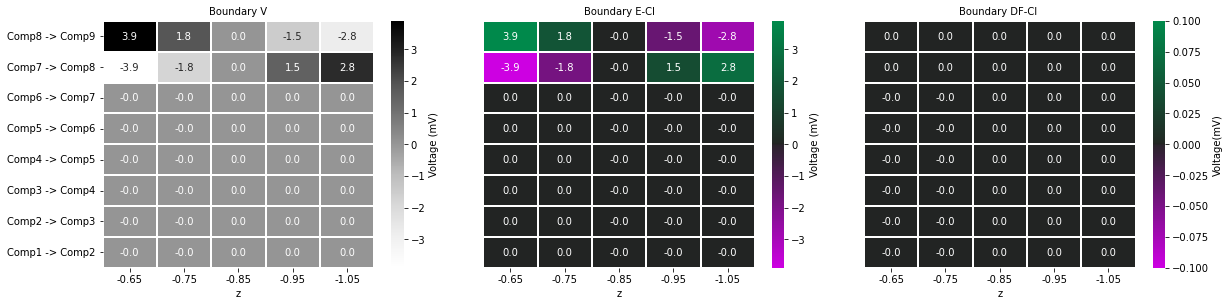

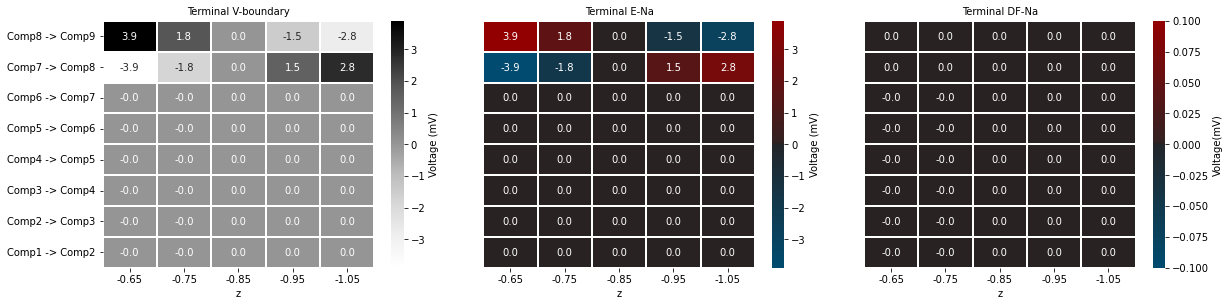

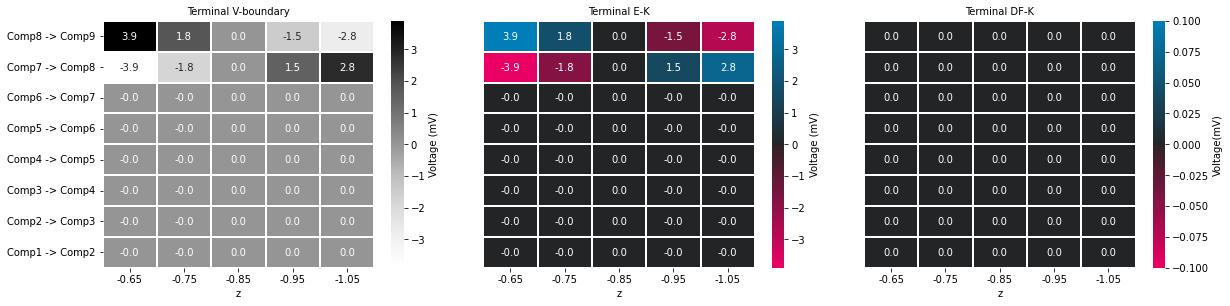

In [13]:
######
btn_plot_3c = widgets.Button(description="Plot 3C", button_style='success')
display(btn_plot_3c)
#####


z_arr_2 = [-0.65,-0.75,-0.85,-0.95,-1.05]


def btn_plot_3c_clicked(b):
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    f3c_cl, (ax_vb1 , ax_ecl,ax_cldf)=mplt.subplots(1,3, figsize=(16,4))
    f3c_na, (ax_vb2 , ax_ena,ax_nadf)  =mplt.subplots(1,3, figsize=(16,4))      
    f3c_k,  (ax_vb3 , ax_ek,ax_kdf) =mplt.subplots(1,3, figsize=(16,4))
    f3c_cl.tight_layout(pad=1)
    f3c_na.tight_layout(pad=1)
    f3c_k.tight_layout(pad=1)
    
    cl_cmap = sns.diverging_palette(300, 140,l=50,s=100, center='dark', as_cmap=True)
    na_cmap = sns.diverging_palette(240, 12,l=30,s=100, center='dark', as_cmap=True) 
    k_cmap = sns.diverging_palette(360, 240,l=50,s=100, center='dark', as_cmap=True)

    vb_arr = []
    b_ecl_arr,b_ena_arr, b_ek_arr = [],[],[]
    b_dfcl_arr, b_dfna_arr, b_dfk_arr = [], [], []
    
    

    for i in range(0,8):
        
        vb_temp = []
        b_ecl_temp = []
        b_ena_temp = []
        b_ek_temp = []
        b_dfcl_temp = []
        b_dfk_temp = []
        b_dfna_temp = []
        
        for j in range(len(mega_ed_arr)) :
            
            vb = round((mega_arr[j][i][-1][-3] - mega_arr[j][i+1][-1][-3]) *1e3,1)
            vb_temp.append(vb)
            
            b_ecl = round((-RTF * np.log(mega_arr[j][i+1][-1][6] / mega_arr[j][i][-1][6]))*1e3,1)
            b_ecl_temp.append(b_ecl)
            b_ena = round((RTF * np.log(mega_arr[j][i+1][-1][4] / mega_arr[j][i][-1][4]))*1e3,1)
            b_ena_temp.append(b_ena)
            b_ek = round((RTF * np.log(mega_arr[j][i+1][-1][5] / mega_arr[j][i][-1][5]))*1e3,1)
            b_ek_temp.append(b_ek)
            b_dfcl_temp.append(round(vb-b_ecl,1))
            b_dfna_temp.append(round(vb-b_ena,1))
            b_dfk_temp.append(round(vb-b_ek,1))
            
            
        vb_arr.append(vb_temp)
        b_ecl_arr.append(b_ecl_temp)
        b_ena_arr.append(b_ena_temp)
        b_ek_arr.append(b_ek_temp)
        b_dfcl_arr.append(b_dfcl_temp)
        b_dfna_arr.append(b_dfna_temp)
        b_dfk_arr.append(b_dfk_temp)
        
    
    ############
    # Cl graphs
    ############
    
    vb_arr.reverse()
    b_ecl_arr.reverse()
    b_ena_arr.reverse()
    b_ek_arr.reverse()
    b_dfcl_arr.reverse()
    b_dfna_arr.reverse()
    b_dfk_arr.reverse()
    
    bound_names_arr = [comp_names_arr[i] + ' -> ' + comp_names_arr[i+1] for i in range(len(comp_names_arr)-1)]
    bound_names_arr.reverse()
    
    
    g = sns.heatmap(vb_arr,cmap="Greys", annot=True,fmt='', yticklabels =True, 
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vb1,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_yticklabels(bound_names_arr,fontsize=10,rotation=0)
    g.set_xlabel("z",fontsize=10)
    ax_vb1.set_title("Boundary V",fontsize=10)
    
    g = sns.heatmap(b_ecl_arr,cmap=cl_cmap, annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)','orientation':'vertical' }, ax=ax_ecl,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_ecl.set_title("Boundary E-Cl",fontsize=10)
    
     
    g = sns.heatmap(b_dfcl_arr,cmap=cl_cmap, annot = True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_cldf,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_cldf.set_title("Boundary DF-Cl ",fontsize=10)
    
    ##################
    # Na graphs
    ##################
    
    g = sns.heatmap(vb_arr,cmap="Greys", annot=True,fmt='', yticklabels =True, 
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vb2,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_yticklabels(bound_names_arr,fontsize=10,rotation=0)
    g.set_xlabel("z",fontsize=10)
    ax_vb2.set_title("Terminal V-boundary",fontsize=10)
    
    g = sns.heatmap(b_ena_arr,cmap=na_cmap, annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)','orientation':'vertical' }, ax=ax_ena,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_ena.set_title("Terminal E-Na",fontsize=10)
    
    g = sns.heatmap(b_dfna_arr,cmap=na_cmap,annot = True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_nadf,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_nadf.set_title("Terminal DF-Na",fontsize=10)
    
    #################
    # K graphs
    #################
    
    
               
    
    g = sns.heatmap(vb_arr,cmap="Greys", annot=True,fmt='', yticklabels =True, 
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vb3,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_yticklabels(bound_names_arr,fontsize=10,rotation=0)
    g.set_xlabel("z",fontsize=10)
    ax_vb3.set_title("Terminal V-boundary",fontsize=10)
    
    g = sns.heatmap(b_ek_arr,cmap=k_cmap, annot=True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage (mV)','orientation':'vertical' }, ax=ax_ek,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_ek.set_title("Terminal E-K",fontsize=10)
    
    g = sns.heatmap(b_dfk_arr,cmap=k_cmap, annot = True,fmt='', yticklabels = False,
                    cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_kdf,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("z",fontsize=10)
    ax_kdf.set_title("Terminal DF-K",fontsize=10)


    
#####
btn_plot_3c.on_click(btn_plot_3c_clicked)


5
8


In [11]:
print(t_arr[-1])

299.9699993346652
